# Computer Simulation on Market Prediction 

## Background

This notebook contains a simulation exercise for deriving an optimal strategy of an investment scenario. 

Let $r$ be the outcome of a price movement. When price goes down $r=0$ and if price goes up $r=1$. Let $s$ denotes our prediction. If we predict price to go down then $s=0$ and otherwise $s=1$. 

Let $p_D$ denotes the probability of $r=0$ i.e the probability of the price going down and let $q_D$ be the frequency in which we predict price going down. Note that $q_D$ will be our choice variable i.e. we choose $q_D$ to maximise our *expected return*. 

The payoff function suggests that if $r=s$ i.e. when our prediction is the same as the outcome, then we earn $\rho_w>0$. If $r\neq s$, then we lost $\rho_l <0$. So the expected value of our investment scenario is 

$$ 
\mathbb{E} (z) = \rho_w \Pr(r=s) + \rho_l \Pr (r\neq s)
$$

## Simulation 

What do we need? 

1. We need something to simulate the market outcomes based on $p_D$. 
2. We need something to simulate our prediction based on $q_D$. 
3. We need to compare $r$ and $s$. 
4. Calculate the payoff when $r=s$ and when $r\neq s$. 
    
We first import all the library. 

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

The next step is to set up the relevant parameters. Let set the payoff as 

\begin{align}
    \rho_w &= 1 \\
    \rho_l &= -1 
\end{align}

and the relevant probabilities 

\begin{align}
    P_D &= 0.5 \\
    q_D &= 0.5.
 \end{align}
 
Note that $q_D$ will be our choice variable i.e., we get to change it to see what will give us the highest expected return. 

To simulate market outcome we will utilise an uniform random variable that ranges between 0 and 1, denotes $u_s \sim U(0,1)$. The idea is that if $u < p_D$ then the market is down since $\Pr(u_s<p_D) = p_D$. This allows us to simulate $s$. 
The same logic applies to $r$, that is, we will be using an independent uniform random variable to simulate our strategy. That is $u_r \sim U(0,1)$ if $u_r < q_D$ then we will be betting on down. 

In [3]:
pD, qD=0.5, 0.5 # setup the probabilities of market outcome and our prediction 
rhow, rhol = 1, -1 # setup our payoff function
N = 5000 # Number of investment we are going to make 
s = sps.uniform.rvs(size=N) < pD # simulating market outcome
r = sps.uniform.rvs(size=N) < qD # simulation our prediction 
payoff = sum(rhow*(s==r) + rhol*(s!=r)) # calculation of payoff

In [4]:
payoff

36

Now the code above can give us the payoff for a particular value of $q_D$. We wish to explore all the possible values of $q_D$ to see which one can give us the highest expected payoff.  We can do that by calculating the expected payoff for a set of $q_D$. 

In [9]:
pD = 0.6
rhow, rhol = 1, -1 
xrange = np.arange(0,1.01,0.01) # setup our different strategies
payoff = np.empty(shape=xrange.shape[0]) # initiate an array to store the payoff for different strategies. 
for i,qD in enumerate(xrange):
    s = sps.uniform.rvs(size=N) < pD # simulating market outcome
    r = sps.uniform.rvs(size=N) < qD # simulation our prediction 
    payoff[i] = sum(rhow*(s==r) + rhol*(s!=r)) # calculation of payoff

Text(0, 0.5, 'Expected payoff')

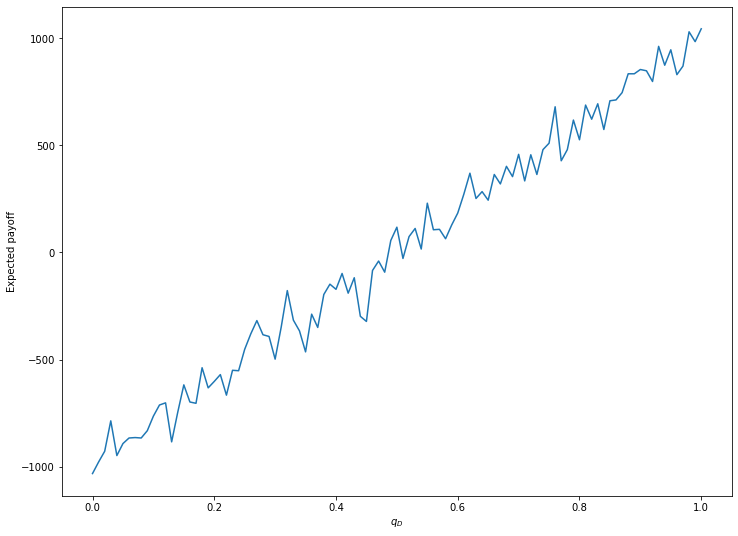

In [12]:
plt.plot(xrange, payoff)
plt.xlabel("$q_D$")
plt.ylabel("Expected payoff")

In [11]:
np.mean(payoff)

3.900990099009901